In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import warnings

%matplotlib inline

warnings.filterwarnings('ignore')

2021-11-24 22:39:28.497321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-24 22:39:28.497379: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
BATCH_SIZE = 16

CUR_PATH = os.path.abspath('')
TEST_PATH = CUR_PATH + '/../../../dataset/data/test'

classes = {0 : "Baby",
           1 : "Not Baby"}

val_test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          samplewise_center = True,
                                                          samplewise_std_normalization = True)

val_test_datagen.apply_transform

scores = {}

In [3]:
IMAGE_SIZE = 160

res = tf.keras.models.load_model("model_resnet.h5")
res_ft = tf.keras.models.load_model("model_resnet_ft.h5")

test_ds = val_test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode = 'rgb',
        class_mode='binary')

scores['ResNet-50 RT'] = res.evaluate(test_ds)
scores['ResNet-50 FT'] = res_ft.evaluate(test_ds)

2021-11-24 22:39:30.677247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /mnt/disk/miniconda3/envs/face/lib/python3.9/site-packages/cv2/../../lib64:
2021-11-24 22:39:30.677321: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-24 22:39:30.677368: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (snf-22339): /proc/driver/nvidia/version does not exist
2021-11-24 22:39:30.677854: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 18 images belonging to 2 classes.


2021-11-24 22:39:38.247987: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2/2 [==============================] - 2s 68ms/step - loss: 0.3021 - accuracy: 0.8889


In [4]:
IMAGE_SIZE = 224

test_ds = val_test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode='rgb',
        class_mode='binary')

vgg_res = tf.keras.models.load_model("model_vggface_resnet.h5")
vgg_res_ft = tf.keras.models.load_model("model_vggface_resnet_ft.h5")

scores['VGGFace (ResNet-50) RT'] = vgg_res.evaluate(test_ds)
scores['VGGFace (ResNet-50) FT'] = vgg_res_ft.evaluate(test_ds)

Found 18 images belonging to 2 classes.
2/2 [==============================] - 2s 73ms/step - loss: 0.6918 - accuracy: 0.5000


In [5]:
IMAGE_SIZE = 224

test_ds = val_test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode = 'rgb',
        class_mode='binary')

vgg_vgg = tf.keras.models.load_model("model_vggface_vgg.h5")
vgg_vgg_ft = tf.keras.models.load_model("model_vggface_vgg_ft.h5")

scores['VGGFace (VGG16) RT'] = vgg_vgg.evaluate(test_ds)
scores['VGGFace (VGG16) FT'] = vgg_vgg_ft.evaluate(test_ds)

Found 18 images belonging to 2 classes.
2/2 [==============================] - 2s 130ms/step - loss: 0.2049 - accuracy: 0.9444


In [6]:
IMAGE_SIZE = 160

vit = tf.keras.models.load_model("model_vit.h5")

test_ds = val_test_datagen.flow_from_directory(
        TEST_PATH,
        target_size=(IMAGE_SIZE, IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        color_mode = 'rgb',
        class_mode='binary')

scores['ViT RT'] = vit.evaluate(test_ds)

Found 18 images belonging to 2 classes.
2/2 [==============================] - 5s 95ms/step - loss: 0.1122 - accuracy: 0.9444


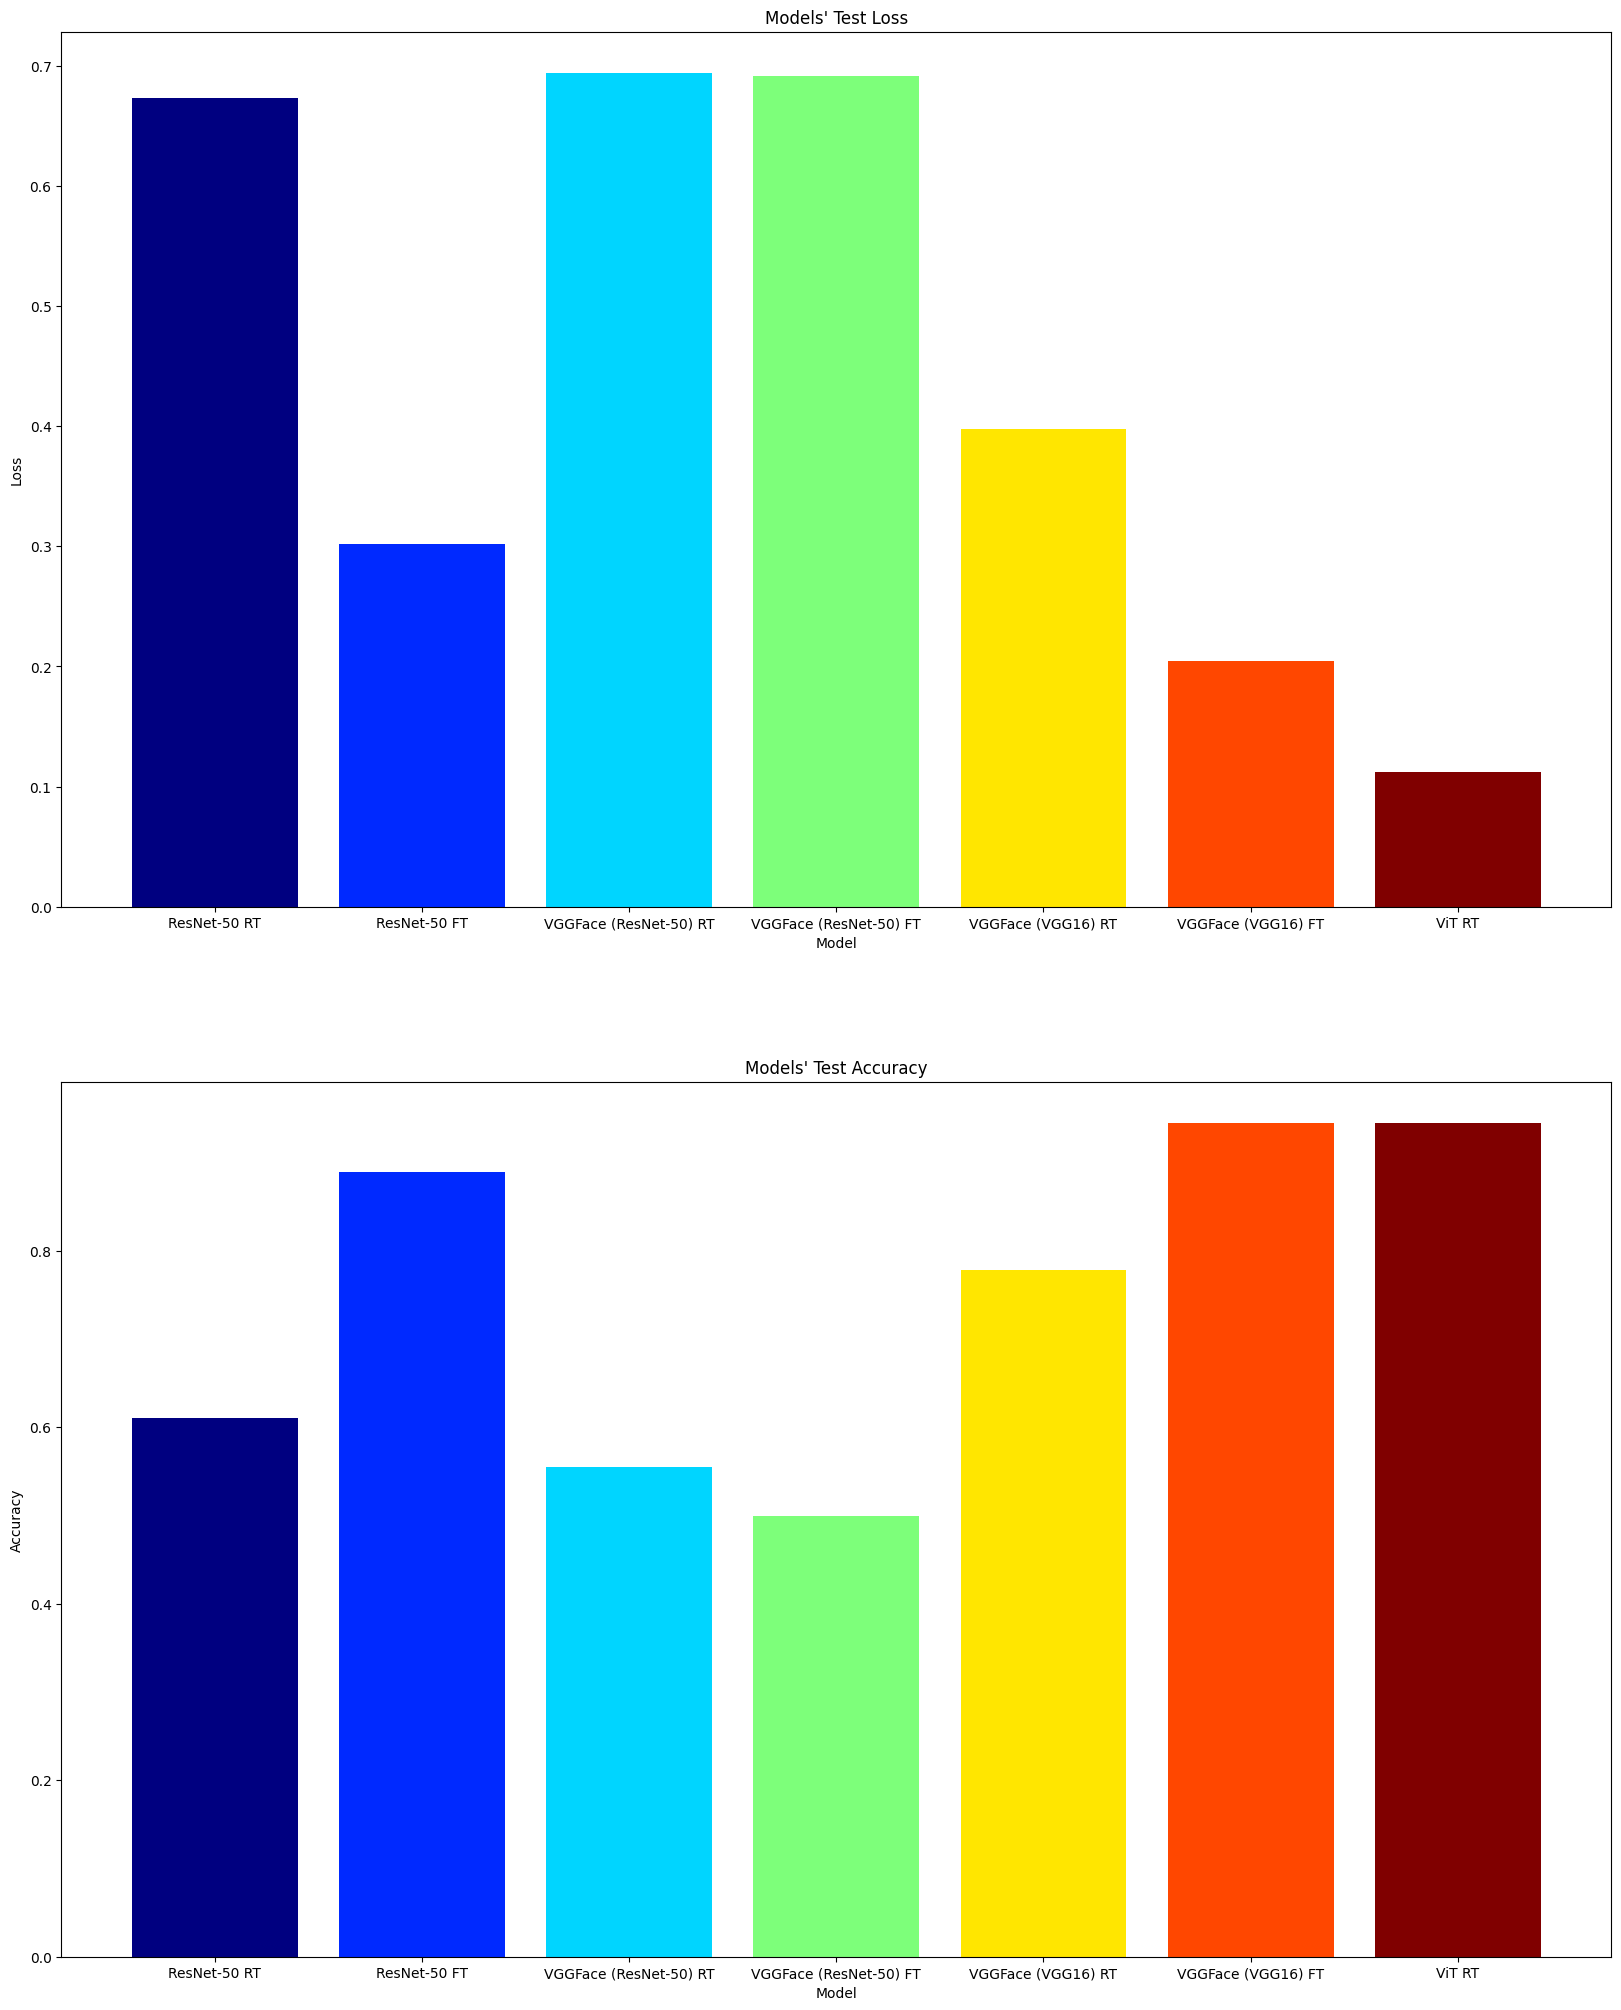

In [25]:
plt.rcdefaults()

x_pos = scores.keys()
losses = [x[0] for x in scores.values()]
accuracies = [x[1] for x in scores.values()]
colors = [plt.cm.jet(1. * i / (len(x_pos) - 1)) for i in range(len(x_pos))]


# plot the results
fig = plt.subplots(2, 1, figsize=(20,25))

plt.subplot(2, 1, 1)
plt.xlabel('Model')
plt.ylabel('Loss')
plt.title("Models' Test Loss")
plt.bar(x_pos, losses, color=colors)

plt.subplot(2, 1, 2)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title("Models' Test Accuracy")
plt.bar(x_pos, accuracies, color=colors)

plt.show()

# plt.savefig("evaluation.png")